# Passo 1: Análise da consistência dos dados

## Importação das bibliotecas

In [167]:
#Bibliotecas de manipulação de dados
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import emoji
import spacy
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from unidecode import unidecode 
#from spellchecker import SpellChecker tentei usar essa lib mas não foi efetiva

# Configurações para padronização dos gráficos
# Para ver todos os parâmetros usar o comando plt.rcParams.keys()
sns.set(rc={
                    'axes.labelsize': 12.0,
                    'axes.titlecolor': 'black',
                    'axes.titleweight': 'bold',
                    'axes.labelweight': 'bold',
                    'axes.titlesize': 20.0,
                    'figure.figsize': [15,10],
                    'figure.titlesize': 'xx-large',
                    'figure.titleweight': 'bold',
                    })

## Análise de missings, duplicados e dados com comportamento anómalo

In [54]:
words_dirty_train = pd.read_csv('Train3Classes.csv')
words_dirty_sub = pd.read_csv('Subm3Classes.csv')

display(words_dirty_train,words_dirty_sub)

,id,tweet_text,tweet_date,sentiment,query_used
0,1049721159292346368,Rio elege maior bancada policial de sua histór...,Tue Oct 09 18:00:01 +0000 2018,2,folha
1,1046251157025423360,fiquei tão triste quando eu vi o preço da câme...,Sun Sep 30 04:11:28 +0000 2018,0,:(
2,1041744620206653440,"Para Theresa May, seu plano para o Brexit é a ...",Mon Sep 17 17:44:06 +0000 2018,2,exame
3,1046937084727107589,caralho eu quero proteger a danielly em um pot...,Tue Oct 02 01:37:06 +0000 2018,0,:(
4,1047326854229778432,@SiCaetano_ viva o caos :),Wed Oct 03 03:25:55 +0000 2018,1,:)
...,...,...,...,...,...
94995,1041831666883321856,Cuba e defensor de direitos humanos se unem co...,Mon Sep 17 23:30:00 +0000 2018,2,jornaloglobo
94996,1032352892194369536,#Oportunidade ➡️ Venha fazer parte da nossa eq...,Wed Aug 22 19:44:44 +0000 2018,2,#oportunidade
94997,1046785538542440448,@96syoo EU SEI 😭😭 é por isso que significa mui...,Mon Oct 01 15:34:55 +0000 2018,0,:(
94998,1045457469110177792,@louistsexhes N te conheço mas posta :D,Thu Sep 27 23:37:38 +0000 2018,1,:)


,id,tweet_text,tweet_date,query_used
0,1046764676707753987,Apartamento Vila Mariana Praça Monteiro dos Sa...,Mon Oct 01 14:12:01 +0000 2018,:)
1,1047329264943751169,@FalleNCS @BrasilGameShow quero 1x1 de scout. ...,Wed Oct 03 03:35:29 +0000 2018,:)
2,1045443874947313665,mais uma analógica no correio à minha espera :...,Thu Sep 27 22:43:37 +0000 2018,:)
3,1040484298711814144,"Em festa de posse como presidente do STF, Toff...",Fri Sep 14 06:16:02 +0000 2018,folha
4,1045411876887306240,@thethiagor @jubsilva @GSCISA @GrupoMulheRIs A...,Thu Sep 27 20:36:28 +0000 2018,:)
...,...,...,...,...
4995,1049243861732794369,"Não é nada demais , apenas a verdade :) — Oh.....",Mon Oct 08 10:23:25 +0000 2018,:)
4996,1039334757690163201,Veja o que é #FATO ou #FAKE na entrevista de A...,Tue Sep 11 02:08:10 +0000 2018,#fato
4997,1049286902577356801,"@nattvieiira de quem???? queria ver, eu sai po...",Mon Oct 08 13:14:27 +0000 2018,:(
4998,1045349300744671232,ASSASSIN'S CREED ORIGINS: ENFRENTANDO OS IRMÃO...,Thu Sep 27 16:27:49 +0000 2018,:)


Na base de treino temos 95 mil linhas com uma coluna de id, uma coluna contento os tweets, uma coluna contento a data, uma coluna contento o sentimento e uma coluna contento a query usada.

Na base de submissão (ou produção) temos somente 5 mil linhas com a mesma coluna, porém sem a coluna de sentimento, a qual iremos prever o resultado após nosso modelo final de NLP

In [55]:
words_dirty_train.info(),words_dirty_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95000 entries, 0 to 94999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          95000 non-null  int64 
 1   tweet_text  95000 non-null  object
 2   tweet_date  95000 non-null  object
 3   sentiment   95000 non-null  int64 
 4   query_used  95000 non-null  object
dtypes: int64(2), object(3)
memory usage: 3.6+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          5000 non-null   int64 
 1   tweet_text  5000 non-null   object
 2   tweet_date  5000 non-null   object
 3   query_used  5000 non-null   object
dtypes: int64(1), object(3)
memory usage: 156.4+ KB


(None, None)

Os datasets não tem dados missing. Vamos analisar se existem dados duplicados

In [56]:
#Criando um filtro para pegar os dados duplicados
filter = words_dirty_train.duplicated()
filter_sub = words_dirty_sub.duplicated()
#Visualizando os valores duplicados em cada dataset
display(words_dirty_train[filter],words_dirty_sub[filter_sub])

,id,tweet_text,tweet_date,sentiment,query_used


,id,tweet_text,tweet_date,query_used


Também não existem dados duplicados, o que é ótimo

In [57]:
#Analisando se algum valor da base de treino está na base de submissão
id_sub_in_train = [client_id for client_id in words_dirty_train['id'] if client_id in words_dirty_sub['id']]

words_dirty_train.loc[id_sub_in_train,:]

,id,tweet_text,tweet_date,sentiment,query_used


Nenhum id de treino existe na base de produção. Vamos analisar se existem id que fazem mais de um tweet ou se são somente ids únicos

In [58]:
print("Na base de treino existem 95 mil linhas e o volume de id únicos de: ",words_dirty_train['id'].nunique())
print("Na base de submissão existem 5 mil linhas e o volume de id únicos de: ",words_dirty_sub['id'].nunique())


Na base de treino existem 95 mil linhas e o volume de id únicos de:  94987
Na base de submissão existem 5 mil linhas e o volume de id únicos de:  5000


Existem 13 clientes que fizeram mais de um tweet na base de treino e nenhum na base de validação. Dessa forma essa coluna não parece ser importante e posteriomente poderá ser descartada

Antes de iniciarmos a análise exploratória, vamos fazer uma limpeza mínima dos dados para facilitar a manipulação e criar algumas colunas úteis

In [59]:
def min_clean_data(data_train, data_sub):
    #Dropando a coluna ID
    words_dirty_train_clean = data_train.drop(columns=['id'])
    words_dirty_sub_clean = data_sub.drop(columns=['id'])

    #Mudando o nome das colunas para facilitar a manipulação
    words_dirty_train_clean.columns = ['text','data','sentiment','query']
    words_dirty_sub_clean.columns = ['text','data','query']

    #Criando uma coluna no formato datetime
    words_dirty_train_clean['date'] = pd.to_datetime(words_dirty_train_clean['data'])
    words_dirty_sub_clean['date'] = pd.to_datetime(words_dirty_sub_clean['data'])

    #Criando uma coluna de mês
    words_dirty_train_clean['month'] = words_dirty_train_clean['date'].dt.month
    words_dirty_sub_clean['month'] = words_dirty_sub_clean['date'].dt.month

    #Criando uma coluna de dia
    words_dirty_train_clean['day'] = words_dirty_train_clean['date'].dt.day
    words_dirty_sub_clean['day'] = words_dirty_sub_clean['date'].dt.day

    #Criando uma coluna de hora
    words_dirty_train_clean['hour'] = words_dirty_train_clean['date'].dt.hour
    words_dirty_sub_clean['hour'] = words_dirty_sub_clean['date'].dt.hour

    #Dropando a coluna original de data e deixando a coluna de data sem horas
    words_dirty_train_clean = words_dirty_train_clean.drop(columns=['data'])
    words_dirty_sub_clean = words_dirty_sub_clean.drop(columns=['data'])
    words_dirty_train_clean['date'] = words_dirty_train_clean['date'].dt.date
    words_dirty_sub_clean['date'] =  words_dirty_sub_clean['date'].dt.date

    return words_dirty_train_clean, words_dirty_sub_clean

In [60]:
words_dirty_train_clean, words_dirty_sub_clean = min_clean_data(words_dirty_train, words_dirty_sub)

display(words_dirty_train_clean,words_dirty_sub_clean)

,text,sentiment,query,date,month,day,hour
0,Rio elege maior bancada policial de sua histór...,2,folha,2018-10-09,10,9,18
1,fiquei tão triste quando eu vi o preço da câme...,0,:(,2018-09-30,9,30,4
2,"Para Theresa May, seu plano para o Brexit é a ...",2,exame,2018-09-17,9,17,17
3,caralho eu quero proteger a danielly em um pot...,0,:(,2018-10-02,10,2,1
4,@SiCaetano_ viva o caos :),1,:),2018-10-03,10,3,3
...,...,...,...,...,...,...,...
94995,Cuba e defensor de direitos humanos se unem co...,2,jornaloglobo,2018-09-17,9,17,23
94996,#Oportunidade ➡️ Venha fazer parte da nossa eq...,2,#oportunidade,2018-08-22,8,22,19
94997,@96syoo EU SEI 😭😭 é por isso que significa mui...,0,:(,2018-10-01,10,1,15
94998,@louistsexhes N te conheço mas posta :D,1,:),2018-09-27,9,27,23


,text,query,date,month,day,hour
0,Apartamento Vila Mariana Praça Monteiro dos Sa...,:),2018-10-01,10,1,14
1,@FalleNCS @BrasilGameShow quero 1x1 de scout. ...,:),2018-10-03,10,3,3
2,mais uma analógica no correio à minha espera :...,:),2018-09-27,9,27,22
3,"Em festa de posse como presidente do STF, Toff...",folha,2018-09-14,9,14,6
4,@thethiagor @jubsilva @GSCISA @GrupoMulheRIs A...,:),2018-09-27,9,27,20
...,...,...,...,...,...,...
4995,"Não é nada demais , apenas a verdade :) — Oh.....",:),2018-10-08,10,8,10
4996,Veja o que é #FATO ou #FAKE na entrevista de A...,#fato,2018-09-11,9,11,2
4997,"@nattvieiira de quem???? queria ver, eu sai po...",:(,2018-10-08,10,8,13
4998,ASSASSIN'S CREED ORIGINS: ENFRENTANDO OS IRMÃO...,:),2018-09-27,9,27,16


# Passo 2: Análise exploratória e Pre Processamento

## Analise exploratória antes do pré processamento

Primeiro vamos olhar para a coluna de datas

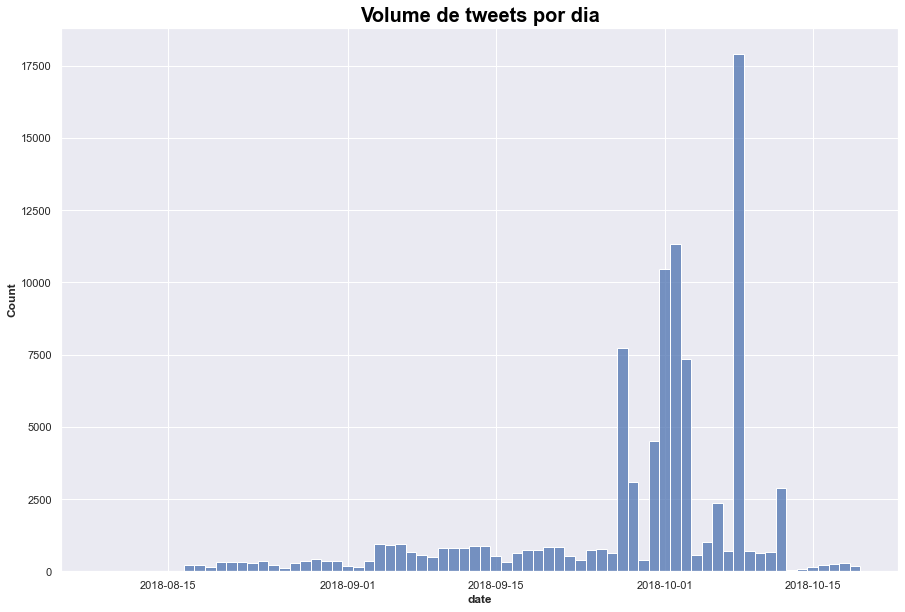

In [61]:
#Criando um histograma de volume de tweets por dia
graph = sns.histplot(data=words_dirty_train_clean['date'])
graph.set_title('Volume de tweets por dia');

Entre o dia 20 de setembro e o dia 10 de outubro parece ser havido um grande volume de tweets. Depois veremos o conteúdo dos tweets nesse intervalo de data para enteder o que ocorreu nesse período

Text(0.5, 0, 'Hora do dia')

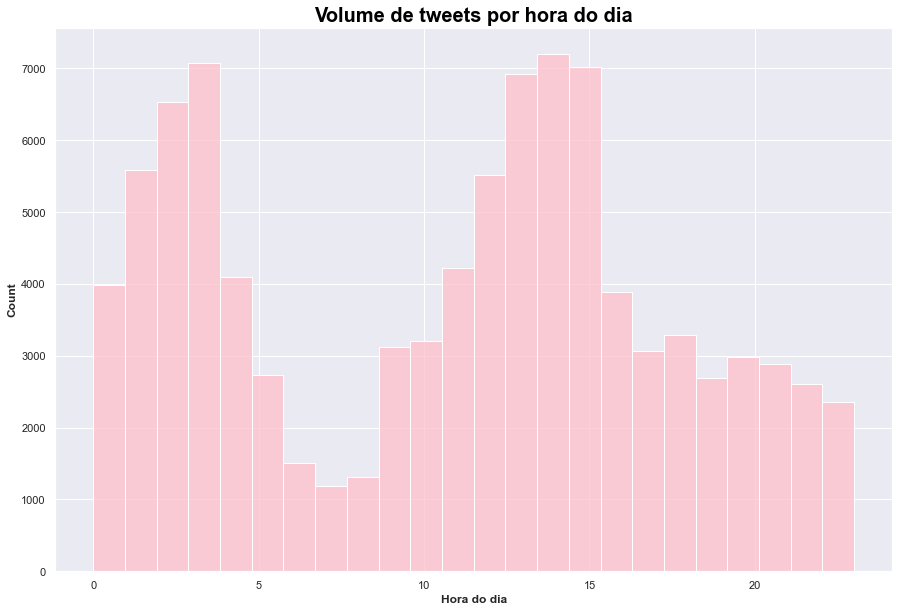

In [62]:
#Criando um histograma de volume de tweets por hora
graph = sns.histplot(data=words_dirty_train_clean['hour'],bins=24,color='pink')
graph.set_title('Volume de tweets por hora do dia')
graph.set_xlabel('Hora do dia')

O volume de tweets foi bem intenso entre 2h e 4h da madrugada e entre 11h e 15 h. Vamos olhar mês a mês para entender melhor esse comportamento

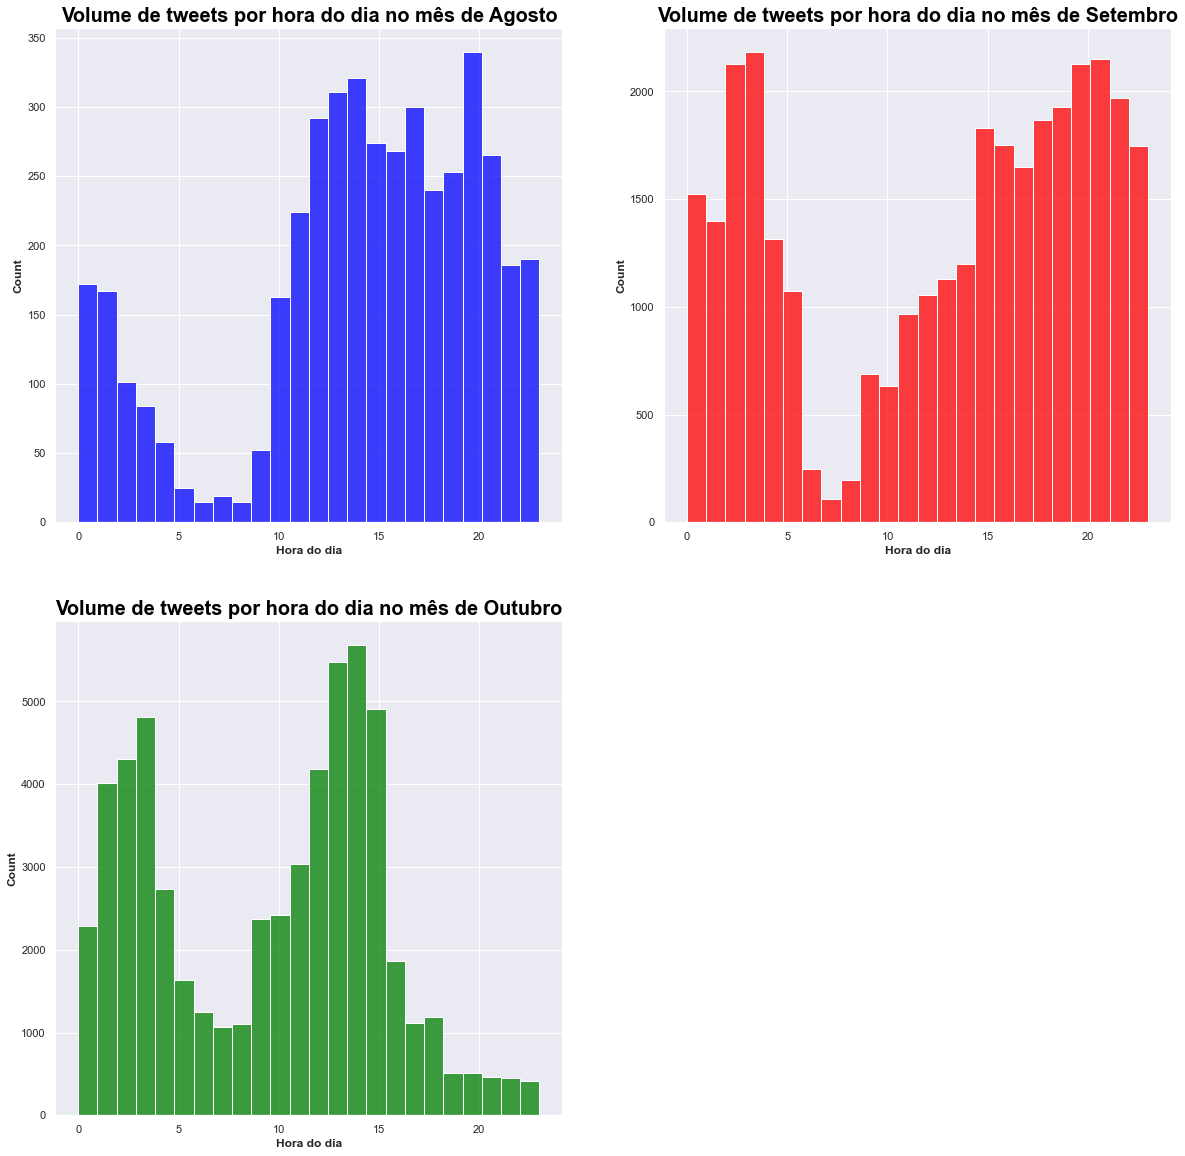

In [63]:
#Criando um grid de subplots
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(20,20))
axes = axes.ravel()
color = ['blue','red','green']

#Criando um histograma para cada mês do ano
for i, ax,c in zip([8,9,10],axes,color):
    filter = words_dirty_train_clean['month'] == i
    graph = sns.histplot(data=words_dirty_train_clean[filter],x='hour',bins=24,ax=ax,color=c)
    if i == 8: 
        i = "Agosto" 
    elif i == 9:  
        i = "Setembro" 
    else: 
        i = "Outubro"
    graph.set_title('Volume de tweets por hora do dia no mês de '+str(i))
    graph.set_xlabel('Hora do dia')

fig.delaxes(axes[3])

Em agosto o volume de tweets foi bem irrisório, comparativamente a outubro e setembro.

Em setembro o volume de tweets entre 15h e 23h foi bem elevado. Já em outubro o padrão foi o mesmo de quando consideramos todos os meses tendo altos volumes entre 2h - 4h e 11h - 15h. 

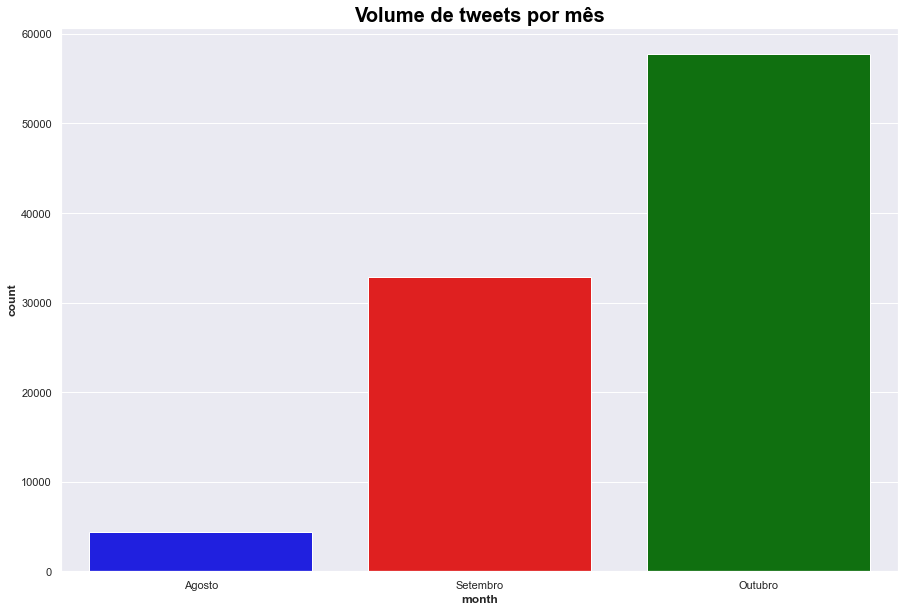

In [64]:
graph = sns.countplot(data=words_dirty_train_clean,x='month',palette=['blue','red','green'])
graph.set_title('Volume de tweets por mês')
graph.set_xticklabels(labels=['Agosto','Setembro','Outubro']);

Novamente surge a curiosidade do que ocorreu em setembro e outubro para o volume de tweets ter aumentado tanto em relação a agosto

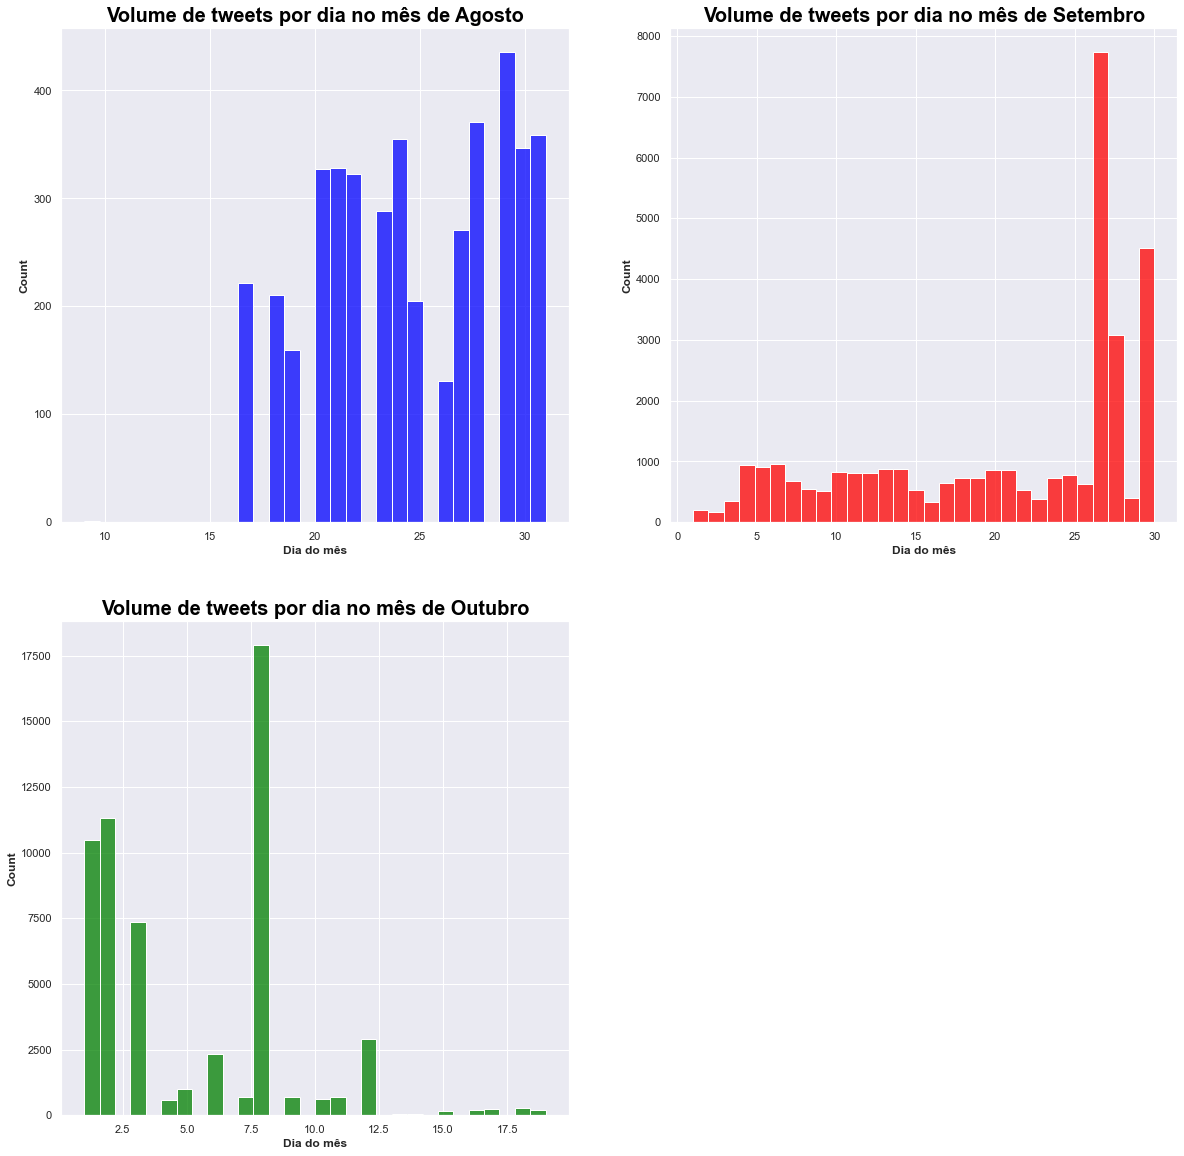

In [65]:
#Criando um grid de subplots
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(20,20))
axes = axes.ravel()
color = ['blue','red','green']

#Criando um histograma para cada mês do ano
for i, ax,c in zip([8,9,10],axes,color):
    filter = words_dirty_train_clean['month'] == i
    graph = sns.histplot(data=words_dirty_train_clean[filter],x='day',bins=30,ax=ax,color=c)
    if i == 8: 
        i = "Agosto" 
    elif i == 9:  
        i = "Setembro" 
    else: 
        i = "Outubro"
    graph.set_title('Volume de tweets por dia no mês de '+str(i))
    graph.set_xlabel('Dia do mês')

fig.delaxes(axes[3])

Como no dia 27 de setembro, 1,2,8 de outubro houveram picos consideráveis, bem possívelmente foram eventos diferentes sendo intensamente comentados na rede social

Vamos olhar para as querys usadas para buscar as publicações

In [66]:
#Verificando o volume de tweets por query
words_dirty_train_clean['query'].value_counts()

:(               31696
:)               31678
folha             5004
estadao           3880
#fato             3471
g1                3439
exame             3417
#trabalho         3030
#oportunidade     2455
jornaloglobo      2374
veja              2141
#noticia          1114
#novidade          920
#curiosidade       381
Name: query, dtype: int64

Não são muitas querys diferentes e a maior parte está concentrada em emojis. É possível perceber que são querys bem generalistas, vinculadas a grandes empresas de comunicação

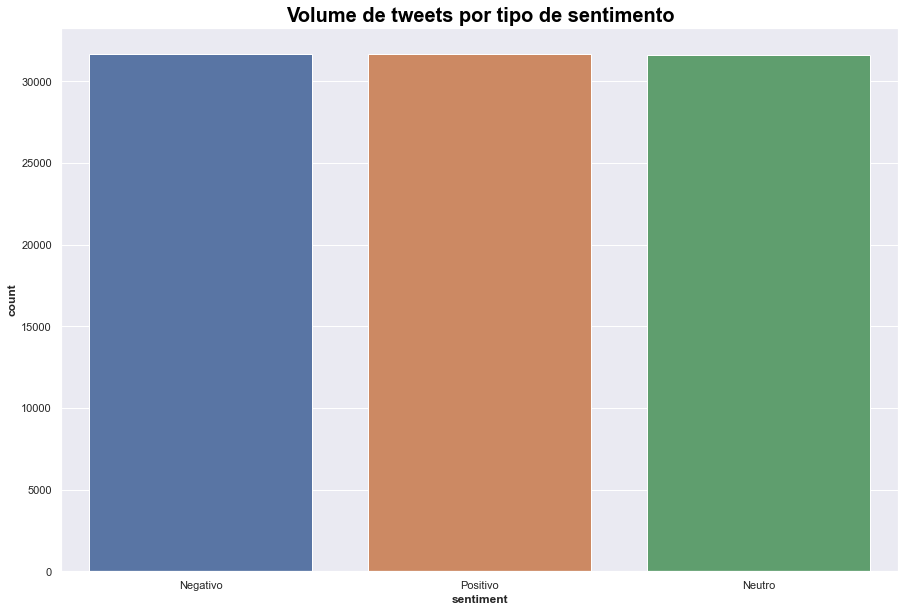

In [67]:
graph = sns.countplot(data=words_dirty_train_clean,x='sentiment')
graph.set_title('Volume de tweets por tipo de sentimento')
graph.set_xticklabels(labels=['Negativo','Positivo','Neutro']);

O dataset está com a variável target bastante balanceada, o que é excelente

In [68]:
pd.crosstab(index=words_dirty_train_clean['query'],columns=words_dirty_train_clean['sentiment'],values=words_dirty_train_clean['hour'],aggfunc='count')

sentiment,0,1,2
query,,,
#curiosidade,NaN,NaN,381.0
#fato,NaN,NaN,3471.0
#noticia,NaN,NaN,1114.0
#novidade,NaN,NaN,920.0
#oportunidade,NaN,NaN,2455.0
#trabalho,NaN,NaN,3030.0
:(,31696.0,NaN,NaN
:),NaN,31678.0,NaN
estadao,NaN,NaN,3880.0


Existe consistência nos dados, as querys relacionados a emojis de sentimento negativo resultam em tweets com sentimento negativo e as querys relacionadas a emojis de sentimento positivo resultam em tweets com sentimento positivo. As querys relacionadas a veículos de comunicação resultam em sentimentos neutros

## Pre processamento

Para o pre processamento vamos criar uma função para fazer a limpeza dos dados na coluna dos tweets

In [ ]:
nlp = spacy.load('pt_core_news_lg')


In [194]:
def pre_process(row,nlp=nlp):
    
    #Removendo menções
    row = re.sub(r'@[a-zA-Z0-9_]{1,50}','',row)
    #Removendo o links:
    row = re.sub(r'(https:\/\/.+)','',row)
    #Colocando todas as palavras em minúsculo
    row = row.lower()
    #Removendo todos os :d (sorriso):
    row = row.replace(':d','')
    #Removendo os espaços do inicio e final de cada frase
    row = row.strip()
    #Removendo os digitos
    row = re.sub(r'\d+','',row)
    #Removendo a acentuação
    row = unidecode(row)
    #Removendo os caracteres especiais
    row = re.sub(r'[^a-zA-Z0-9]',' ',row)
    #Tokenizando
    doc = nlp(row)
    stopwords_pt = stopwords.words('portuguese')
    #Vamos manter as palavras "não" e "muito" já que elas podem ser importantes para a análise
    stopwords_pt =[word for word in stopwords_pt if word not in ['não','muito']]
    #Removendo as stopwords:
    row = [word for word in doc if word.text not in stopwords_pt]
    #Removendo palavras que não tem lemma
    row = [word.lemma_.strip() for word in row if word.lemma_]
    #Removendo elementos vazio 
    row = [word for word in row if word != '']
    return row

In [181]:
'''def pre_process(row):
    
    #Removendo menções
    row = re.sub(r'@[a-zA-Z0-9_]{1,50}','',row)
    #Removendo o links:
    row = re.sub(r'(https:\/\/.+)','',row)
    #Colocando todas as palavras em minúsculo
    row = row.lower()
    #Removendo todos os :d (sorriso):
    row = row.replace(':d','')
    #Removendo os espaços do inicio e final de cada frase
    row = row.strip()
    #Removendo os digitos
    row = re.sub(r'\d+','',row)
    #Removendo a acentuação
    row = unidecode(row)
    #Removendo os caracteres especiais
    row = re.sub(r'[^a-zA-Z0-9]',' ',row)
    #Tokenizando
    row = word_tokenize(row)
    #Criando a lista de stopwords
    stopwords_pt = stopwords.words('portuguese')
    #Vamos manter as palavras "não" e "muito" já que elas podem ser importantes para a análise
    stopwords_pt =[word for word in stopwords_pt if word not in ['não','muito']]
    #Removendo as stopwords:
    row = [word for word in row if word not in stopwords_pt]
    
    return row'''

In [195]:
for i in range(100):
    print(words_dirty_train_clean['text'][i])
    print(pre_process(words_dirty_train_clean['text'][i]))

Rio elege maior bancada policial de sua história https://t.co/sGXnhZKrHx https://t.co/Mcgiz70jPF
['rir', 'eleger', 'maior', 'bancada', 'policial', 'historiar']
fiquei tão triste quando eu vi o preço da câmera :((((
['ficar', 'tao', 'triste', 'vir', 'preco', 'camera']
Para Theresa May, seu plano para o Brexit é a única opção https://t.co/epl39YD9bj
['theresa', 'may', 'planar', 'brexit', 'unica', 'opcao']
caralho eu quero proteger a danielly em um pote tadinhaa :(
['caralho', 'querer', 'proteger', 'danielly', 'pote', 'tadinhaa']
@SiCaetano_ viva o caos :)
['vivo', 'caos']
@ppolkiss Parabéns moço :D
['parabens', 'moco']
Trago verdades #fato https://t.co/DsbkrJgFVj
['trazer', 'verdade', 'fato']
A coleção aumentou, mas o espaço do quaro "diminuiu", inviabilizando novas fotos :D https://t.co/bTrZPxSXqO
['colecao', 'aumentar', 'espaco', 'quaro', 'diminuir', 'inviabilizar', 'novo', 'foto']
@abreujaviera Amigaa :(
['amigaa']
fiquei exatos 45 minutos tentando conectar meu teclado no computador :

Conclusões até o momento para olhar os textos
- 27 de setembro, 1,2,8 de outro, o volume de tweets é maior
- Entre 2 -4 h e 11 e 15 h o volume de tweets é maior